# Data Manipulation

# 1. Imports

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
# Define file paths
EN_FILE_PATH = "../Datasets/WikiMatrix/WikiMatrix.en-hi.en"
HI_FILE_PATH = "../Datasets/WikiMatrix/WikiMatrix.en-hi.hi"
OUTPUT_FILE_PATH = "../Datasets/WikiMatrix/processed_data.csv"

def process_and_write_to_csv(en_file_path, hi_file_path, output_file_path):
    """
    Reads two text files (English and Hindi), processes line pairs, and writes them to a CSV file.
    """
    with open(en_file_path, "r", encoding="utf-8") as en_file, \
         open(hi_file_path, "r", encoding="utf-8") as hi_file, \
         open(output_file_path, "w", encoding="utf-8", newline="") as csv_file:
        
        writer = csv.writer(csv_file)
        writer.writerow(["English", "Hindi"])  # Write header

        for en_sentence, hi_sentence in zip(en_file, hi_file):
            writer.writerow([en_sentence.strip(), hi_sentence.strip()])

        print(f"Data written successfully to '{output_file_path}'")

if __name__ == "__main__":
    # Call the function to process and write to CSV
    process_and_write_to_csv(EN_FILE_PATH, HI_FILE_PATH, OUTPUT_FILE_PATH)


Data written successfully to '../Datasets/WikiMatrix/processed_data.csv'


In [3]:
# Load the processed data and configure pandas display options
raw_data = pd.read_csv(OUTPUT_FILE_PATH)
pd.set_option('display.max_colwidth', None)
# Display 10 random samples from the dataset
raw_data.sample(10)

,English,Hindi
119424,"In people with mild disease, imaging is needed only in those with potential complications, those not having improved with treatment, or those in which the cause is uncertain.","हल्के रोग की दशा वाले लोगों में इमेजिंग केवल उन लोगों में जरूरी होती है जिनमें संभावित जटिलतायें होती है, जो उपचार से बेहतर नहीं होते हैं या जिनमें कारण अनिश्चित होते हैं।"
101120,These angles can be reproduced on the drawing surface and then rechecked to make sure they are accurate.,इन कोणों को रेखाचित्र सतह पर पुनः प्रस्तुत किया जा सकता है और फिर यह सुनिश्चित करने के लिए फिर से जांचा जा सकता है कि वे सटीक हैं।
139054,Studies by social psychologists Stivers and Greeley attempt to document the perceived prevalence of high alcohol consumption amongst the Irish in America.,सामाजिक मनोवैज्ञानिक स्टिवर्स और ग्रीले के अध्ययनों में अमेरिका के आयरिश समुदाय के बीच बहुत ज्यादा शराब के सेवन के देखे गए प्रसार का प्रलेखन करने का प्रयास किया गया है।
74271,"Archimedes (c. 287–212 BC) of Syracuse used the method of exhaustion to calculate the area under the arc of a parabola with the summation of an infinite series, and gave remarkably accurate approximations of Pi.",सिरैक्यूज़ के आर्किमिडीज (Syracuse)(सी. २८७-२१२ ई.पू.) ने एक अपरिमित श्रृंखला के समेशन (method of exhaustion) के साथ एक परवलय के चाप के अंतर्गत क्षेत्रफल की गणना करने के लिए समाप्ति की विधी का उपयोग किया और पाई (Pi) का एक उल्लेखनीय सटीक सन्निकटन दिया।
195425,He was the subject of an attempted assassination by a car bomb in 1989 in Furn El Chebbak.,वह बेरूत में कार बम द्वारा 1979 में मार डाला।
148857,"Measured by quantity sold, Itanium's most serious competition comes from x86-64 processors including Intel's own Xeon line and AMD's Opteron line.","बेची गई मात्रा के आधार पर, आइटेनीयम की सबसे गंभीर प्रतिस्पर्धा इंटेल की अपनी ज़ीऑन लाइन और एएमडी की ओपर्टन लाइन सहित x86-64 प्रोसेसर से आती है।"
163793,"The best postremission therapy for intermediate-risk AML (normal cytogenetics or cytogenetic changes not falling into good-risk or high-risk groups) is less clear and depends on the specific situation, including the age and overall health of the person, the person's values, and whether a suitable stem cell donor is available.","इंटरमीडिएट-जोखिम एएमएल (सामान्य साइटोगेनेटिक्स या साइटोगेनेटिक परिवर्तन अच्छे जोखिम या उच्च जोखिम वाले समूहों में नहीं आते) के लिए सबसे अच्छा पोस्ट्रेमिशन थेरेपी कम स्पष्ट है और व्यक्ति की कीमतों और व्यक्ति के समग्र स्वास्थ्य सहित विशिष्ट स्थिति पर निर्भर करता है , और क्या उपयुक्त स्टेम सेल दाता उपलब्ध है।"
21593,She also served as Minister of Women's Affairs.,उन्होंने महिला मामलों के मंत्री के रूप में भी कार्य किया।
115046,Later money and clothing began to arrive.,तभी यहाँ कपड़े और चाँदी का व्यापार शुरू हुआ।
49933,"Due to the match-fixing scandals in 2000 by other players of the team, and for his poor health, Indian captain Sachin Tendulkar resigned his position, and Ganguly was made the captain of the Indian cricket team.","२००० में टीम के अन्य खिलाड़ियों द्वारा मैच फिक्सिंग घोटालों के कारण, और उनके खराब स्वास्थ्य के लिए, भारतीय कप्तान सचिन तेंदुलकर ने अपना पद त्याग दिया और गांगुली को भारतीय क्रिकेट टीम का कप्तान बनाया गया था।"


Random Sampling Check:
- The processed data is loaded from the specified CSV file into a pandas DataFrame.
- `pd.set_option('display.max_colwidth', None)` ensures that no truncation occurs when displaying long text values in the DataFrame.
- A random sample of 10 rows is selected using `sample(10)` to visually inspect the data.
  This step is performed to verify the correctness of the 'source' and 'target' pairs.


In [4]:
# 1. Check for null values
print("Checking for null values...")
print(raw_data.isnull().sum())


Checking for null values...
English    1
Hindi      1
dtype: int64


In [5]:
raw_data.dropna(inplace=True)

In [6]:

# 2. Check for duplicate rows
print("\nChecking for duplicate rows...")
duplicate_count = raw_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")



Checking for duplicate rows...
Number of duplicate rows: 0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231459 entries, 0 to 231458
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  231459 non-null  object
 1   Hindi    231459 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [8]:
# Add columns for word count in both English and Hindi sentences
raw_data['English_word_count'] = raw_data['English'].str.split().apply(len)
raw_data['Hindi_word_count'] = raw_data['Hindi'].str.split().apply(len)

# Display the updated dataframe with word count columns
raw_data


,English,Hindi,English_word_count,Hindi_word_count
0,Recite in the name of your Lord who created—Created man from a clinging substance.,"अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।",14,12
1,They were tenants to their lord.,अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।,6,13
2,Indeed your Lord is the All-beneficent.,तुम्हारा रब एक है।,6,4
3,"I mean, we all lived in this century.","मेरा मतलब है, हम सभी को इस सदी में रहते थे।",8,11
4,Be steadfastly righteous!,अतः तुम वही करो जो उचित है।,3,7
...,...,...,...,...
231454,"As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.","2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।",27,32
231455,Latin is also an option which can be taken from Year 7.,7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।,12,14
231456,Siege Weapons of the Far East: AD 300–1300.,इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।,8,9
231457,"Five points in general position suffice to provide these five pieces of information, while four points do not.","उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करना अपने हाथ को अपना सिद्ध करने के बराबर है, परन्तु पाँचवाँ स्वयंतथ्‌य स्वयंसिद्ध सा प्रतीत नहीं होता।",18,34


In [9]:
raw_data['English_word_count'].describe()

count    231459.000000
mean         17.753118
std          44.143017
min           1.000000
25%          10.000000
50%          15.000000
75%          23.000000
max       17848.000000
Name: English_word_count, dtype: float64

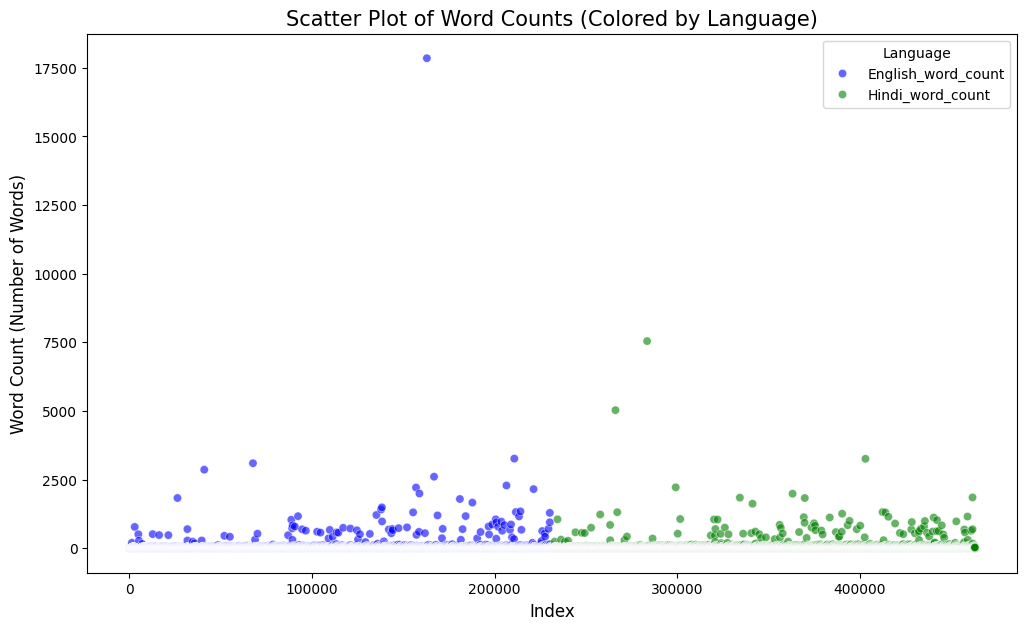

In [10]:
# Create a new DataFrame with sentence indices and word counts for both English and Hindi
scatter_data = raw_data[['English_word_count', 'Hindi_word_count']].melt(var_name='Language', value_name='Word_Count')

# Map 'Language' to colors
scatter_data['Color'] = scatter_data['Language'].map({'English_word_count': 'blue', 'Hindi_word_count': 'green'})

# Create a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=range(len(scatter_data)), y='Word_Count', hue='Language', data=scatter_data, palette={'English_word_count': 'blue', 'Hindi_word_count': 'green'}, alpha=0.6)

# Add titles and labels
plt.title("Scatter Plot of Word Counts (Colored by Language)", fontsize=15)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Word Count (Number of Words)", fontsize=12)

# Show the plot
plt.show()



### Explanation:
1. **Data Transformation**:
   - The `melt()` function is used to combine the two word count columns (`English_word_count` and `Hindi_word_count`) into a single column (`Word_Count`), with a corresponding `Language` column that indicates whether the word count is from the English or Hindi column.

2. **Color Mapping**:
   - The `Color` column is created by mapping the `Language` values (`English_word_count` and `Hindi_word_count`) to colors (`blue` for English and `green` for Hindi).

3. **Scatter Plot**:
   - `sns.scatterplot()` is used to plot the scatter plot:
     - `x=range(len(scatter_data))` sets the x-axis as the index of the data points (i.e., the position of each sentence).
     - `y='Word_Count'` plots the word count for each sentence.
     - `hue='Language'` colors the points based on the language (English or Hindi).
     - `palette={'English_word_count': 'blue', 'Hindi_word_count': 'green'}` specifies the colors for each language.

4. **Plot Customization**:
   - The `plt.xlabel()` and `plt.ylabel()` set the labels for the x and y axes, respectively.
   - `plt.title()` adds the plot title.

---

### Output:
- The scatter plot will show the word count for each sentence, with points colored according to whether the word count belongs to English or Hindi (`blue` for English and `green` for Hindi).
- The **x-axis** will represent the sentence index, and the **y-axis** will represent the word count.


In [11]:
# Filter rows where English word count is greater than 200
filtered_data = raw_data[raw_data['English_word_count'] > 100]
filtered_data = raw_data[raw_data['Hindi_word_count'] > 100]


# Display the filtered rows
filtered_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


English  \
1357                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [12]:
# Filter rows where English_word_count is greater than 100
filtered_data_english = raw_data[raw_data['English_word_count'] > 100]

# Filter rows where Hindi_word_count is greater than 100
filtered_data_hindi = raw_data[raw_data['Hindi_word_count'] > 100]

# Combine the indices of both filtered DataFrames
indices_to_drop = filtered_data_english.index.union(filtered_data_hindi.index)

# Drop the rows with the combined indices from the original DataFrame
raw_data.drop(indices_to_drop, inplace=True)

# Display the updated DataFrame
raw_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]

,English,Hindi,English_word_count,Hindi_word_count
0,Recite in the name of your Lord who created—Created man from a clinging substance.,"अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।",14,12
1,They were tenants to their lord.,अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।,6,13
2,Indeed your Lord is the All-beneficent.,तुम्हारा रब एक है।,6,4
3,"I mean, we all lived in this century.","मेरा मतलब है, हम सभी को इस सदी में रहते थे।",8,11
4,Be steadfastly righteous!,अतः तुम वही करो जो उचित है।,3,7
...,...,...,...,...
231454,"As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.","2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।",27,32
231455,Latin is also an option which can be taken from Year 7.,7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।,12,14
231456,Siege Weapons of the Far East: AD 300–1300.,इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।,8,9
231457,"Five points in general position suffice to provide these five pieces of information, while four points do not.","उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करना अपने हाथ को अपना सिद्ध करने के बराबर है, परन्तु पाँचवाँ स्वयंतथ्‌य स्वयंसिद्ध सा प्रतीत नहीं होता।",18,34


### Explanation:
1. **Filtering and Dropping Rows**:
   - `raw_data[raw_data['English_word_count'] > 100].index` gives the indices of the rows where the English word count is greater than 200.
   - `raw_data.drop(..., inplace=True)` removes those rows from the `raw_data` DataFrame, modifying it in place.

2. **Displaying the Updated DataFrame**:
   - After dropping the rows, `head()` is used to display the first few rows of the updated DataFrame to verify that the rows have been dropped.

---

### Output:
- The rows with an English word count greater than 100 will be removed from the `raw_data` DataFrame.
- The remaining rows will be displayed with the `English`, `Hindi`, `English_word_count`, and `Hindi_word_count` columns.

This operation will modify the original `raw_data` DataFrame directly without creating a new DataFrame.



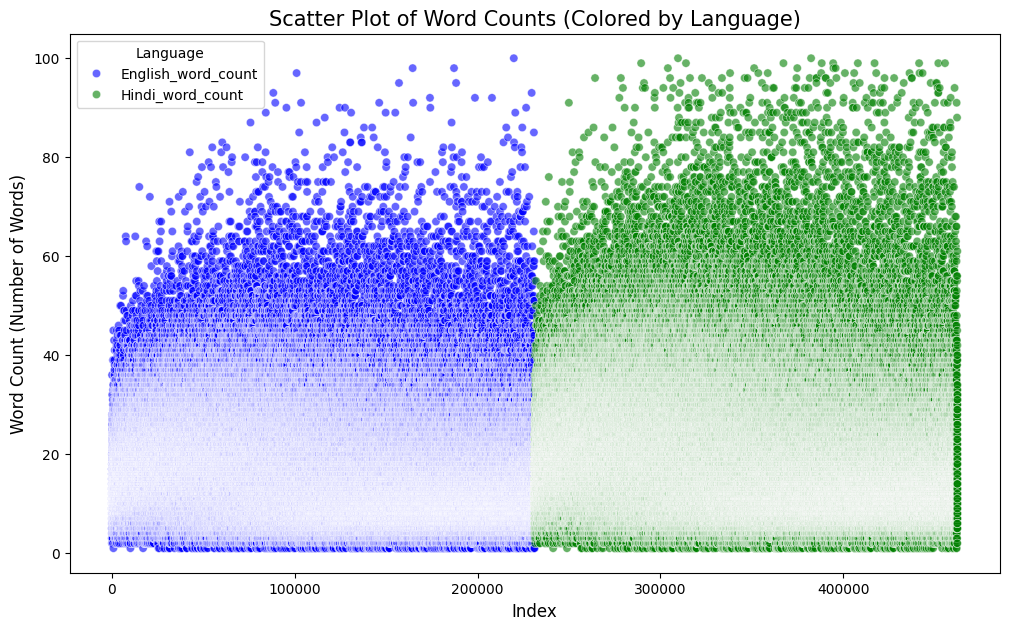

In [13]:
# Create a new DataFrame with sentence indices and word counts for both English and Hindi
scatter_data = raw_data[['English_word_count', 'Hindi_word_count']].melt(var_name='Language', value_name='Word_Count')

# Map 'Language' to colors
scatter_data['Color'] = scatter_data['Language'].map({'English_word_count': 'blue', 'Hindi_word_count': 'green'})

# Create a scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=range(len(scatter_data)), y='Word_Count', hue='Language', data=scatter_data, palette={'English_word_count': 'blue', 'Hindi_word_count': 'green'}, alpha=0.6)

# Add titles and labels
plt.title("Scatter Plot of Word Counts (Colored by Language)", fontsize=15)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Word Count (Number of Words)", fontsize=12)

# Show the plot
plt.show()

In [14]:
# Check for empty strings in English and Hindi columns
empty_english = raw_data[raw_data['English'].str.strip() == '']
empty_hindi = raw_data[raw_data['Hindi'].str.strip() == '']

# Display rows with empty English strings
print("Rows with empty English strings:")
print(empty_english[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']])

# Display rows with empty Hindi strings
print("\nRows with empty Hindi strings:")
print(empty_hindi[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']])


Rows with empty English strings:
Empty DataFrame
Columns: [English, Hindi, English_word_count, Hindi_word_count]
Index: []

Rows with empty Hindi strings:
Empty DataFrame
Columns: [English, Hindi, English_word_count, Hindi_word_count]
Index: []


In [15]:
# Define regex patterns to match Chinese, Sanskrit (Devanagari), and Urdu characters
chinese_pattern = r'[\u4e00-\u9fff]'  # Chinese characters
sanskrit_pattern = r'[\u0900-\u097F]'  # Devanagari characters (same as Hindi)
urdu_pattern = r'[\u0600-\u06FF]'     # Arabic script (Urdu)

# Combine the patterns into one regex to detect any of these languages
non_hindi_pattern = chinese_pattern + "|" + sanskrit_pattern + "|" + urdu_pattern

# Filter rows where the Hindi sentence contains any of these characters (non-Hindi)
non_hindi_rows = raw_data[raw_data['English'].str.contains(non_hindi_pattern, regex=True)]

# Display the rows with non-Hindi sentences in the Hindi column
print("Rows with Chinese, Sanskrit, or Urdu sentences in the Hindi column:")
non_hindi_rows[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


Rows with Chinese, Sanskrit, or Urdu sentences in the Hindi column:


,English,Hindi,English_word_count,Hindi_word_count
303,Hidāyah (هداية) guidance from God.,हिदायह (هداية) अल्लाह से मार्गदर्शन।,5,5
563,"Dār al-Islām (دار الإسلام) the abode, or land, of Islam.","दार अल-इस्लाम (دار الإسلام) इस्लाम का निवास, या भूमि।",10,9
1041,"Jannah (جنة) Paradise, Heaven, the Garden Jazāka-llāhu khayran (جزاك اللهُ خيرًا) ""May God reward you with good.""","जन्नह (جنة) स्वर्ग, स्वर्ग, गार्डन जज़ाक अल्लाहु खैरा (جزاك الله خيرا) ""अल्लाह आपको अच्छे से इनाम दे सकते हैं।",17,19
1312,Muḥsin (محسن) a person who performs good deed.,मोहसिन (محسن) एक व्यक्ति जो अच्छा काम करता है।,8,9
1487,गंगाशरण सिंह पुरस्कार,गंगाशरण सिंह पुरस्कार,3,3
...,...,...,...,...
229663,"Muhammad Aurangzeb or Qateel Shifai (Urdu: قتِیل شِفائ ‎), (24 December 1919 – 11 July 2001) was a Pakistani Urdu language poet.",मुहम्मद औरंगज़ेब या क़तील शिफ़ाई (उर्दू : قتلیل شِفائ ) (24 दिसंबर 1919 - 11 जुलाई 2001) एक पाकिस्तानी उर्दू भाषा के कवि थे।,22,24
229765,"King Abdulaziz International Airport (KAIA) (Arabic: مطار الملك عبدالعزيز الدولي‎) (IATA: JED, ICAO: OEJN) is an airport located 19 km to the north of Jeddah.","किंग अब्दुल अज़ीज़ अन्तर्राष्ट्रीय विमानक्षेत्र (KAIA) (अरबी: مطار الملك عبدالعزيز الدولي‎) (आईएटीए: JED , आईसीएओ: OEJN) सऊदी अरब के शहर जेद्दाह से १९ कि.मी उत्तर में स्थित एक अन्तर्राष्ट्रीय विमानक्षेत्र है।",25,31
230491,"""فروزان؛ ستاره‌ای خاموش می‌شود"".",इस से तारे की चमक (निरपेक्ष कान्तिमान) बढ़ जाती है।,4,10
231191,"""पूर्व कांग्रेस सांसद सुरेन्द्र कुमार सिंह का निधन"".",कांग्रेस के कैप्टन अमरिंदर सिंह यहाँ से साँसद हैं।,8,9


To detect non-Hindi sentences in the Hindi column and match specific languages like **Chinese**, **Sanskrit**, or **Urdu**, you can use regular expressions to match specific character ranges commonly used in these languages.

Here’s a breakdown of the character ranges we need:
- **Chinese**: Chinese characters are in the **CJK Unified Ideographs** Unicode block, which is from `\u4e00` to `\u9fff`.
- **Sanskrit**: Sanskrit often uses **Devanagari script**, but it can also include characters from the **IAST transliteration** system or **other extended Unicode blocks**. We can focus on the basic Devanagari range for matching Sanskrit (same as Hindi).
- **Urdu**: Urdu is written in the **Arabic script** and falls within the Unicode block `\u0600-\u06FF` (Arabic, including Urdu).

### Regex Pattern for Matching Chinese, Sanskrit, and Urdu Characters:

- **Chinese characters**: `[\u4e00-\u9fff]`
- **Sanskrit (Devanagari)**: `[\u0900-\u097F]` (same as Hindi, but we can modify this for Sanskrit if needed)
- **Urdu**: `[\u0600-\u06FF]`

### Updated Code to Detect Chinese, Sanskrit, or Urdu in the Hindi Column:



### Explanation:
1. **Regex Patterns**:
   - `[\u4e00-\u9fff]`: Matches Chinese characters in the CJK Unified Ideographs block.
   - `[\u0900-\u097F]`: Matches Devanagari characters (used in both Sanskrit and Hindi).
   - `[\u0600-\u06FF]`: Matches characters in the Arabic script (commonly used for Urdu).

2. **Combining Patterns**:
   - The patterns for Chinese, Sanskrit, and Urdu are combined using the `|` (OR) operator to create a single regex pattern that can detect any of these scripts in the Hindi column.

3. **`str.contains()`**:
   - This method checks whether the `Hindi` column contains any characters that match the combined regex pattern, which would indicate that the sentence is written in Chinese, Sanskrit, or Urdu.

4. **Displaying the Rows**:
   - The rows with Chinese, Sanskrit, or Urdu text in the Hindi column are filtered into the `non_hindi_rows` DataFrame and displayed with the relevant columns.

---

### Output:
This will print all rows where the **Hindi** column contains Chinese, Sanskrit (Devanagari), or Urdu characters. You'll see the full row, including the `English`, `Hindi`, `English_word_count`, and `Hindi_word_count` columns.


In [16]:
# Define regex patterns to match Chinese, Sanskrit (Devanagari), and Urdu characters
chinese_pattern = r'[\u4e00-\u9fff]'  # Chinese characters
sanskrit_pattern = r'[\u0900-\u097F]'  # Devanagari characters (same as Hindi)
urdu_pattern = r'[\u0600-\u06FF]'     # Arabic script (Urdu)

# Combine the patterns into one regex to detect any of these languages
non_hindi_pattern = chinese_pattern + "|" + sanskrit_pattern + "|" + urdu_pattern

# Drop rows where the English sentence contains any of these characters (non-English)
raw_data.drop(raw_data[raw_data['English'].str.contains(non_hindi_pattern, regex=True)].index, inplace=True)

# Display the updated DataFrame to verify
raw_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


,English,Hindi,English_word_count,Hindi_word_count
0,Recite in the name of your Lord who created—Created man from a clinging substance.,"अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।",14,12
1,They were tenants to their lord.,अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।,6,13
2,Indeed your Lord is the All-beneficent.,तुम्हारा रब एक है।,6,4
3,"I mean, we all lived in this century.","मेरा मतलब है, हम सभी को इस सदी में रहते थे।",8,11
4,Be steadfastly righteous!,अतः तुम वही करो जो उचित है।,3,7
...,...,...,...,...
231454,"As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.","2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।",27,32
231455,Latin is also an option which can be taken from Year 7.,7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।,12,14
231456,Siege Weapons of the Far East: AD 300–1300.,इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।,8,9
231457,"Five points in general position suffice to provide these five pieces of information, while four points do not.","उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करना अपने हाथ को अपना सिद्ध करने के बराबर है, परन्तु पाँचवाँ स्वयंतथ्‌य स्वयंसिद्ध सा प्रतीत नहीं होता।",18,34


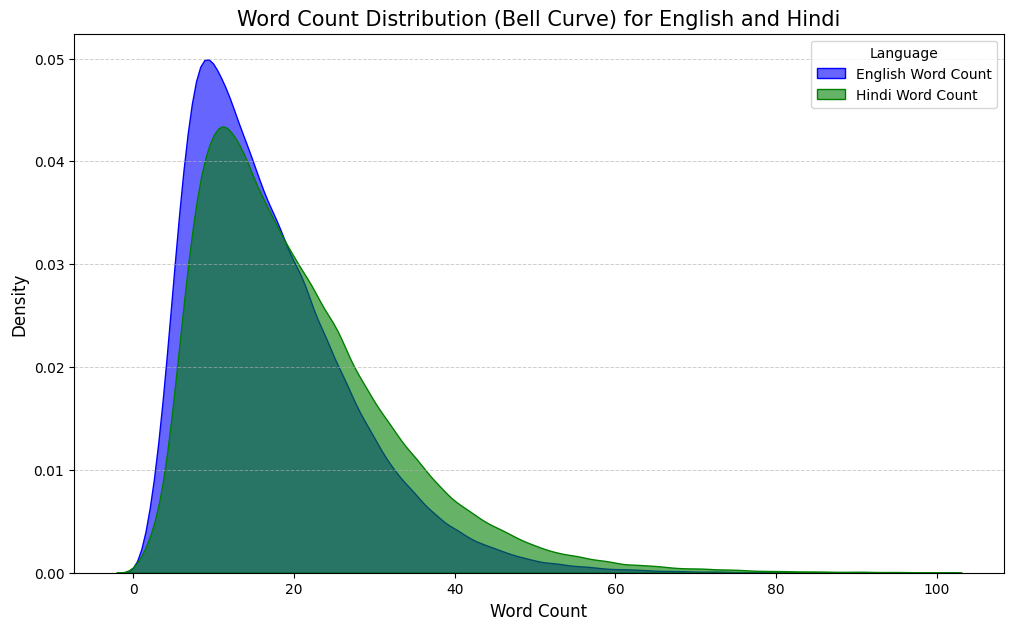

English Word Count - Mean: 17.271603865783472  Std Dev: 10.378314285297423
Hindi Word Count - Mean: 20.44195460962102  Std Dev: 12.336790958318668


In [17]:
# Plot the distribution of the word counts in the English and Hindi columns

plt.figure(figsize=(12, 7))

# Plot for English word count
sns.kdeplot(raw_data['English_word_count'], label='English Word Count', fill=True, color='blue', alpha=0.6)

# Plot for Hindi word count
sns.kdeplot(raw_data['Hindi_word_count'], label='Hindi Word Count', fill=True, color='green', alpha=0.6)

# Add titles and labels
plt.title('Word Count Distribution (Bell Curve) for English and Hindi', fontsize=15)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Show the plot
plt.show()

# Print the mean and standard deviation for both English and Hindi word counts
print("English Word Count - Mean:", raw_data['English_word_count'].mean(), " Std Dev:", raw_data['English_word_count'].std())
print("Hindi Word Count - Mean:", raw_data['Hindi_word_count'].mean(), " Std Dev:", raw_data['Hindi_word_count'].std())


To plot a **bell curve** (normal distribution) of sentence lengths or word counts, we can use **seaborn** and **matplotlib** to visualize the distribution. This will help us understand the mean and the most frequent values, as well as whether the data roughly follows a normal distribution (bell curve).

We can plot the distribution of the **English word count** and **Hindi word count** columns as individual bell curves to check for the frequency and spread of these values.

### Code to Plot Bell Curve for English and Hindi Word Counts:

### Explanation:
1. **Kernel Density Estimate (KDE) Plot**: 
   - `sns.kdeplot()` is used to plot the **kernel density estimate** (KDE), which is a smoothed version of the histogram and can give us an idea of the distribution (bell curve).
   - We plot the **English word count** and **Hindi word count** separately on the same graph with different colors.

2. **`fill=True`**: This option fills the area under the curve to make it visually appealing and easier to interpret.
   
3. **Mean and Standard Deviation**: 
   - The mean and standard deviation of both the **English** and **Hindi word counts** are printed, which will help us understand the central tendency (mean) and spread (standard deviation) of the data.

4. **Plot Appearance**:
   - We use **blue** for English word counts and **green** for Hindi word counts, and labels are added to make it clear.
   - A **grid** is added to help with reading values on the Y-axis.

### Expected Output:
- The plot will display two smoothed curves (KDEs), one for English word counts and one for Hindi word counts.
- The **mean** will indicate where the center of the distribution lies, and the **standard deviation** will show how spread out the values are.
- If the data follows a bell curve, it should have a symmetric shape, with the peak around the mean.


In [18]:
# Drop rows where Hindi word count is more than 50
raw_data.drop(raw_data[raw_data['Hindi_word_count'] > 50].index, inplace=True)

# Display the updated DataFrame to verify
raw_data[['English', 'Hindi', 'English_word_count', 'Hindi_word_count']]


,English,Hindi,English_word_count,Hindi_word_count
0,Recite in the name of your Lord who created—Created man from a clinging substance.,"अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।",14,12
1,They were tenants to their lord.,अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।,6,13
2,Indeed your Lord is the All-beneficent.,तुम्हारा रब एक है।,6,4
3,"I mean, we all lived in this century.","मेरा मतलब है, हम सभी को इस सदी में रहते थे।",8,11
4,Be steadfastly righteous!,अतः तुम वही करो जो उचित है।,3,7
...,...,...,...,...
231454,"As of 2009, there are 79 public schools run by the Ministry of Education that serve Emiratis and expatriate Arab people as well as 145 private schools.","2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।",27,32
231455,Latin is also an option which can be taken from Year 7.,7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।,12,14
231456,Siege Weapons of the Far East: AD 300–1300.,इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।,8,9
231457,"Five points in general position suffice to provide these five pieces of information, while four points do not.","उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करना अपने हाथ को अपना सिद्ध करने के बराबर है, परन्तु पाँचवाँ स्वयंतथ्‌य स्वयंसिद्ध सा प्रतीत नहीं होता।",18,34


In [19]:
# Convert all text in the 'English' column to lowercase
raw_data['English'] = raw_data['English'].str.lower()

# Verify the changes
raw_data  # Display a random sample of 10 rows


,English,Hindi,English_word_count,Hindi_word_count
0,recite in the name of your lord who created—created man from a clinging substance.,"अपने परवरदिगार का नाम ले कर पढ़ो, जिसने (दुनिया को) पैदा ‎किया।",14,12
1,they were tenants to their lord.,अतः वे अपने इष्ट परम प्रभु की उपासना में ही दत्तचित्त रहते थे।,6,13
2,indeed your lord is the all-beneficent.,तुम्हारा रब एक है।,6,4
3,"i mean, we all lived in this century.","मेरा मतलब है, हम सभी को इस सदी में रहते थे।",8,11
4,be steadfastly righteous!,अतः तुम वही करो जो उचित है।,3,7
...,...,...,...,...
231454,"as of 2009, there are 79 public schools run by the ministry of education that serve emiratis and expatriate arab people as well as 145 private schools.","2006 में, वहाँ 88 सार्वजनिक स्कूल है जो शिक्षा मंत्रालय द्वारा संचालित है जो अमीराती लोगों और प्रवासी लोगों को सेवा प्रदान करते है और साथ ही 132 निजी स्कूल भी है।",27,32
231455,latin is also an option which can be taken from year 7.,7 सात वर्ष के बाद खाते से आंशिक निकासी भी की जा सकती है।,12,14
231456,siege weapons of the far east: ad 300–1300.,इतिहासकार इसे ईसा पूर्व 3300-1300 का काल मानते हैं।,8,9
231457,"five points in general position suffice to provide these five pieces of information, while four points do not.","उपर्युक्त पाँच स्वयं तथ्यों में से चार तो इतने सरल तथा सप्ष्ट हैं कि इन्हें सिद्ध करना अपने हाथ को अपना सिद्ध करने के बराबर है, परन्तु पाँचवाँ स्वयंतथ्‌य स्वयंसिद्ध सा प्रतीत नहीं होता।",18,34


### What This Does:
- `str.lower()` converts all uppercase letters to lowercase.
- This ensures case consistency in the text data.

Let me know if you want to apply further transformations or explore any other cleaning methods!

### Impact:
- Reducing Vocabulary Size: Lowercasing can reduce the vocabulary size, which can lead to faster training and inference.


In [20]:
# Select only the 'English' and 'Hindi' columns
processed_data = raw_data[['English', 'Hindi']]

# Define the output file path
processed_output_path = "../Datasets/processed_data.csv"

# Write the processed data to a CSV file
processed_data.to_csv(processed_output_path, index=False, encoding='utf-8')

print(f"Processed data has been saved to: {processed_output_path}")


Processed data has been saved to: ../Datasets/processed_data.csv
